![logo_ironhack_blue 7](https://user-images.githubusercontent.com/23629340/40541063-a07a0a8a-601a-11e8-91b5-2f13e4e6b441.png)

# Lab | Cleaning numerical data

For this lab, we will be using the dataset in the Customer Analysis Business Case. This dataset can be found in `files_for_lab` folder.

## Context

An auto insurance company has collected some data about its customers including their _demographics_, _education_, _employment_, _policy details_, _vehicle information_ on which insurance policy is, and _claim amounts_. You will help the senior management with some business questions that will help them to better understand their customers, improve their services, and improve profitability.

**Some business Objectives**:

- Retain customers,
- Analyze relevant customer data,
- Develop focused customer retention programs.

Based on the analysis, take targeted actions to increase profitable customer response, retention, and growth.

### Instructions

1. Import the necessary libraries.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [2]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')

3. First look at its main features (head, shape, info).

In [3]:
pd.set_option('display.max_columns', None)
customer_df.head()

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [4]:
customer_df.shape

(9134, 24)

In [5]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Customer                       9134 non-null   object 
 1   State                          9134 non-null   object 
 2   Customer Lifetime Value        9134 non-null   float64
 3   Response                       9134 non-null   object 
 4   Coverage                       9134 non-null   object 
 5   Education                      9134 non-null   object 
 6   Effective To Date              9134 non-null   object 
 7   EmploymentStatus               9134 non-null   object 
 8   Gender                         9134 non-null   object 
 9   Income                         9134 non-null   int64  
 10  Location Code                  9134 non-null   object 
 11  Marital Status                 9134 non-null   object 
 12  Monthly Premium Auto           9134 non-null   i

4. Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [6]:
def headers(x):
    x.columns = x.columns.str.replace('[#,@,&,%,?,!,-,:]', '')
    x.columns = x.columns.str.lower() 
    x.columns = x.columns.str.replace(' ', '_')
    return x
# applying the function
customer_df = headers(customer_df)

C:\Users\Jose María\AppData\Local\Temp\ipykernel_4988\282797938.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  x.columns = x.columns.str.replace('[#,@,&,%,?,!,-,:]', '')


In [7]:
customer_df

,customer,state,customer_lifetime_value,response,coverage,education,effective_to_date,employmentstatus,gender,income,location_code,marital_status,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,total_claim_amount,vehicle_class,vehicle_size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,2/10/11,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,2/12/11,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,2/6/11,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,2/3/11,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


5. Change effective to date column to datetime format.

In [8]:
customer_num = customer_df._get_numeric_data()
customer_num


,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,number_of_open_complaints,number_of_policies,total_claim_amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [9]:
def datetime_format(file):
    # Apply a datetime format
    file['effective_to_date'] = pd.to_datetime(file['effective_to_date'], format = "%m/%d/%y", errors='coerce')
    return file
customer_df = datetime_format(customer_df)

In [10]:
customer_df.effective_to_date

0      2011-02-24
1      2011-01-31
2      2011-02-19
3      2011-01-20
4      2011-02-03
          ...    
9129   2011-02-10
9130   2011-02-12
9131   2011-02-06
9132   2011-02-03
9133   2011-02-14
Name: effective_to_date, Length: 9134, dtype: datetime64[ns]

6. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful. Store continuous data into a continuous_df variable and do the same for discrete_df

We have stated our definition of discrete and numerical in the following: counting staff is descrete and measuring staff 


In [11]:
for x in customer_df:
    print(x,len(pd.unique(customer_df[x].values.ravel('K')))) #customer_df.state.nunique()


customer 9134
state 5
customer_lifetime_value 8041
response 2
coverage 3
education 5
effective_to_date 59
employmentstatus 5
gender 2
income 5694
location_code 3
marital_status 3
monthly_premium_auto 202
months_since_last_claim 36
months_since_policy_inception 100
number_of_open_complaints 6
number_of_policies 9
policy_type 3
policy 9
renew_offer_type 4
sales_channel 4
total_claim_amount 5106
vehicle_class 6
vehicle_size 3


We interpretate that having more than 10 different values makes the variable continuous otherwise, is discrete

In [48]:
def continuous_discrete (x):
    a = pd.DataFrame()
    b = pd.DataFrame()
    for column in x:
        if x[column].nunique() <= 10:
            a[column]=x[column]
        else:
            b[column]=x[column]
    return a, b

In [49]:
discrete_df, continuous_df=continuous_discrete(customer_df)

In [50]:
discrete_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


In [51]:
continuous_df

,customer,customer_lifetime_value,effective_to_date,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,BU79786,2763.519279,2011-02-24,56274,69,32,5,384.811147
1,QZ44356,6979.535903,2011-01-31,0,94,13,42,1131.464935
2,AI49188,12887.431650,2011-02-19,48767,108,18,38,566.472247
3,WW63253,7645.861827,2011-01-20,0,106,18,65,529.881344
4,HB64268,2813.692575,2011-02-03,43836,73,12,44,138.130879
...,...,...,...,...,...,...,...,...
9129,LA72316,23405.987980,2011-02-10,71941,73,18,89,198.234764
9130,PK87824,3096.511217,2011-02-12,21604,79,14,28,379.200000
9131,TD14365,8163.890428,2011-02-06,0,85,9,37,790.784983
9132,UP19263,7524.442436,2011-02-03,21941,96,34,3,691.200000


In [52]:
categorical

,customer,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,BU79786,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,QZ44356,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,AI49188,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,WW63253,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,HB64268,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,No,Basic,Bachelor,Employed,M,Urban,Married,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,PK87824,California,Yes,Extended,College,Employed,F,Suburban,Divorced,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,TD14365,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,UP19263,California,No,Extended,College,Employed,M,Suburban,Married,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


7. Plot a correlation matrix, comment what you see.

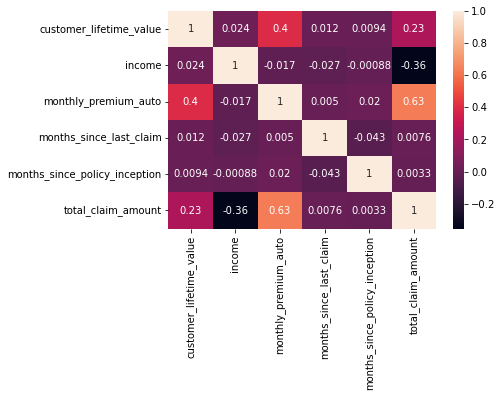

In [53]:
correlations_matrix = continuous_df.corr()
sns.heatmap(correlations_matrix, annot=True) # annot=annotation--> to see the values
plt.show()

In [54]:
# There is a low correlation within the variables, but monthly_premium_auto and total_claim_amount do have quite high correlation 

8. Create a function to plot every discrete variable.  Do the same with the continuous variables (Be Careful, you may need to change the plot type to one better suited for continuous data!)

In [67]:
def hist(x):
    for b in x.columns:
        plt.figure()
        plt.xticks()
        plt.hist(x[b])
        

In [63]:
discrete_df

,state,response,coverage,education,employmentstatus,gender,location_code,marital_status,number_of_open_complaints,number_of_policies,policy_type,policy,renew_offer_type,sales_channel,vehicle_class,vehicle_size
0,Washington,No,Basic,Bachelor,Employed,F,Suburban,Married,0,1,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize
1,Arizona,No,Extended,Bachelor,Unemployed,F,Suburban,Single,0,8,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize
2,Nevada,No,Premium,Bachelor,Employed,F,Suburban,Married,0,2,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize
3,California,No,Basic,Bachelor,Unemployed,M,Suburban,Married,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize
4,Washington,No,Basic,Bachelor,Employed,M,Rural,Single,0,1,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,California,No,Basic,Bachelor,Employed,M,Urban,Married,0,2,Personal Auto,Personal L1,Offer2,Web,Four-Door Car,Medsize
9130,California,Yes,Extended,College,Employed,F,Suburban,Divorced,0,1,Corporate Auto,Corporate L3,Offer1,Branch,Four-Door Car,Medsize
9131,California,No,Extended,Bachelor,Unemployed,M,Suburban,Single,3,2,Corporate Auto,Corporate L2,Offer1,Branch,Four-Door Car,Medsize
9132,California,No,Extended,College,Employed,M,Suburban,Married,0,3,Personal Auto,Personal L2,Offer3,Branch,Four-Door Car,Large


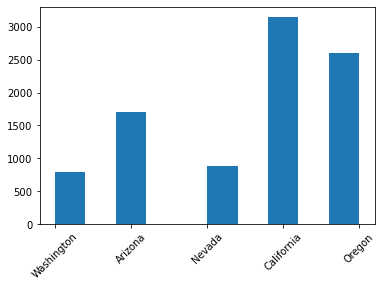

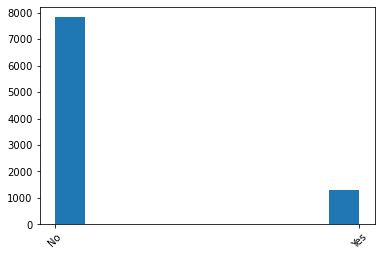

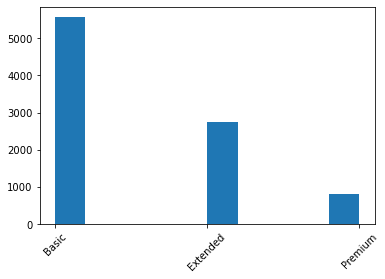

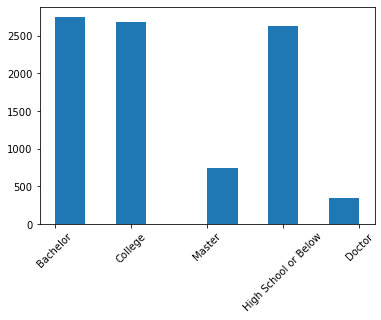

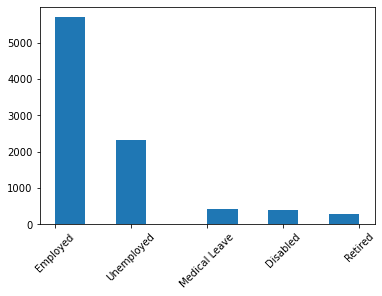

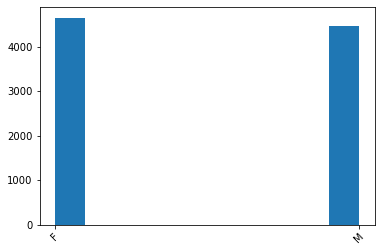

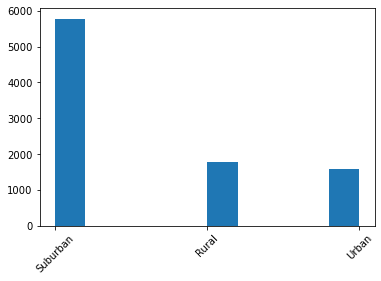

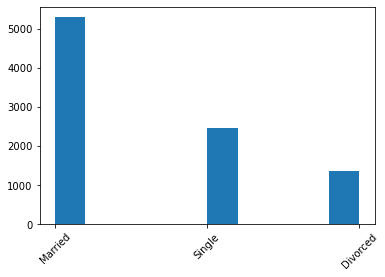

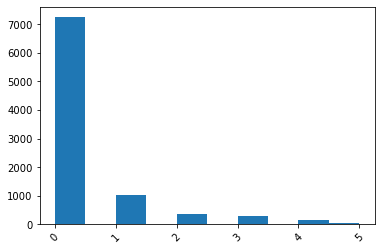

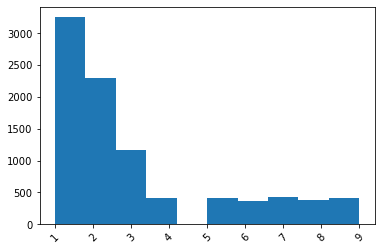

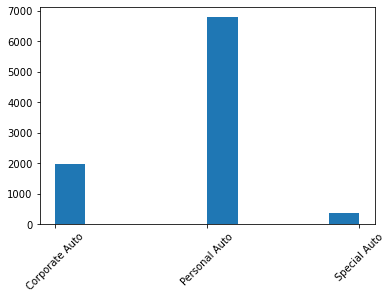

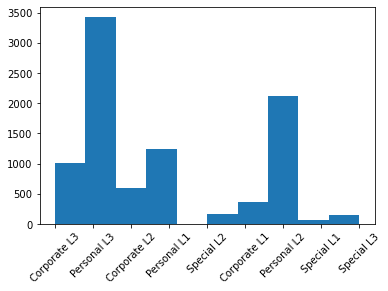

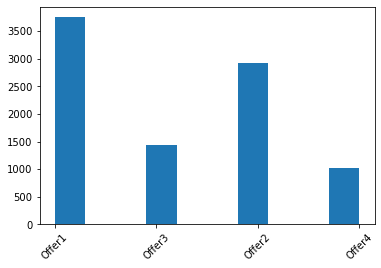

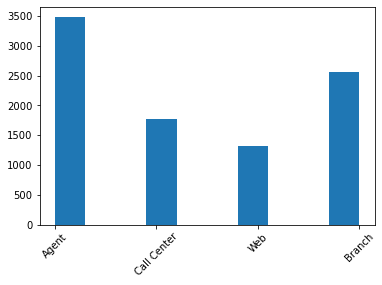

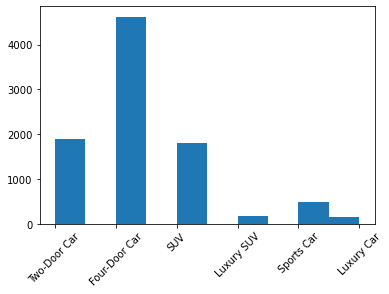

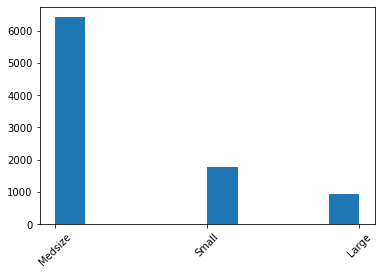

In [64]:
hist(discrete_df)

In [68]:
hist(continuous_df)

Error in callback <function flush_figures at 0x00000219A7CD3D30> (for post_execute):



KeyboardInterrupt



9. Comment what you can see in the plots.

In [ ]:
The distribution in the descrete variables depend on the order you display the categories
The distribution in the continuous variables ... (for some reason it is not displaying the histogram)

10. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

In [96]:
continuous_df2.info() # I can only plot numeric columns, lets check the data types of the continuous data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9134 entries, 0 to 9133
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   customer                       9134 non-null   object 
 1   customer_lifetime_value        9134 non-null   float64
 2   income                         9134 non-null   int64  
 3   monthly_premium_auto           9134 non-null   int64  
 4   months_since_last_claim        9134 non-null   int64  
 5   months_since_policy_inception  9134 non-null   int64  
 6   total_claim_amount             9134 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 499.6+ KB


In [106]:
continuous_num=continuous_df.select_dtypes(np.number)
continuous_num #safe the continuous numeric variables in this df

,customer_lifetime_value,income,monthly_premium_auto,months_since_last_claim,months_since_policy_inception,total_claim_amount
0,2763.519279,56274,69,32,5,384.811147
1,6979.535903,0,94,13,42,1131.464935
2,12887.431650,48767,108,18,38,566.472247
3,7645.861827,0,106,18,65,529.881344
4,2813.692575,43836,73,12,44,138.130879
...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,198.234764
9130,3096.511217,21604,79,14,28,379.200000
9131,8163.890428,0,85,9,37,790.784983
9132,7524.442436,21941,96,34,3,691.200000


In [107]:
def plot(df):
    for column in df.columns:
        sns.boxplot(y=df[column])
        plt.show() 

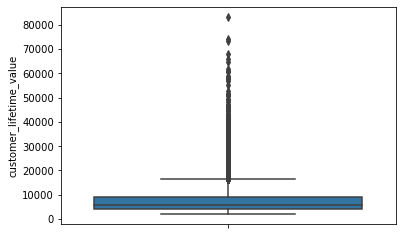

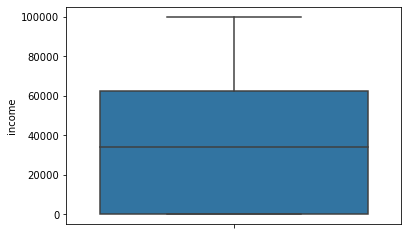

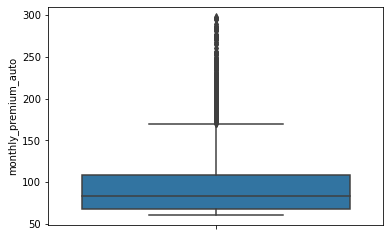

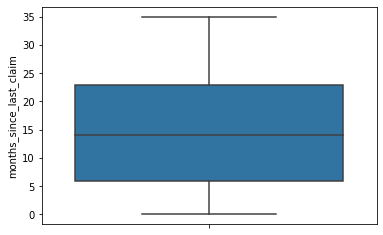

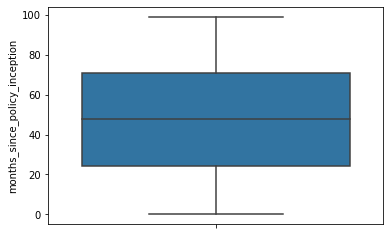

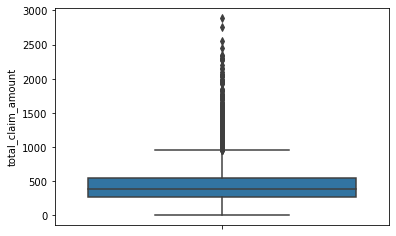

In [108]:
plot(continuous_num)

11. Did you find outliers?  Comment what you will do with them.

In [109]:
# you can see many outliers in 'total_claim_amoun' and in monthly_premium_auto

12. Check all columns for NaN values.  Decide what (if anything) you will need to do with them.

In [110]:
customer_df.isna().sum()

customer                         0
state                            0
customer_lifetime_value          0
response                         0
coverage                         0
education                        0
effective_to_date                0
employmentstatus                 0
gender                           0
income                           0
location_code                    0
marital_status                   0
monthly_premium_auto             0
months_since_last_claim          0
months_since_policy_inception    0
number_of_open_complaints        0
number_of_policies               0
policy_type                      0
policy                           0
renew_offer_type                 0
sales_channel                    0
total_claim_amount               0
vehicle_class                    0
vehicle_size                     0
dtype: int64

In [ ]:
#There is not NaN values